In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [2]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
import argparse
from sklearn.decomposition import PCA
import numpy as np

2022-07-06 16:07:26.573588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 16:07:26.573615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Mnist

In [201]:
args = argparse.Namespace()
args.resize = [32,32]
args.binary_data = [0,1]

data = MNIST(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Binarizing data...
Resizing data...
Binarizing data...
Resizing data...


In [202]:
data

Dataset :MNIST
╒════════╤════════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size         │ Test size         │ Dims        │
╞════════╪════════════════════╪═══════════════════╪═════════════╡
│ X      │ (12665, 32, 32, 1) │ (2115, 32, 32, 1) │ (32, 32, 1) │
├────────┼────────────────────┼───────────────────┼─────────────┤
│ y      │ (12665,)           │ (2115,)           │ (1,)        │
╘════════╧════════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 255.00
Mean: 31.15
Std: 72.64
Train labels stats
Min: 0.00
Max: 1.00

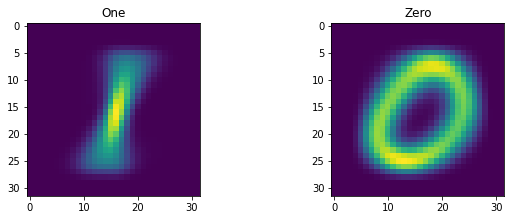

In [204]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # 0, 1
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis = 0))
    plt.title('One' if i ==0 else 'Zero')

## Electron Photon

In [243]:
args = argparse.Namespace()
args.dataset_type = 'med'

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz


In [244]:
data

Dataset :Electron Photon med
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 32, 32, 2) │ (1000, 32, 32, 2) │ (32, 32, 2) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: -2.44
Max: 2.23
Mean: 0.00
Std: 0.05
Train labels stats
Min: 0.00
Max: 1.00

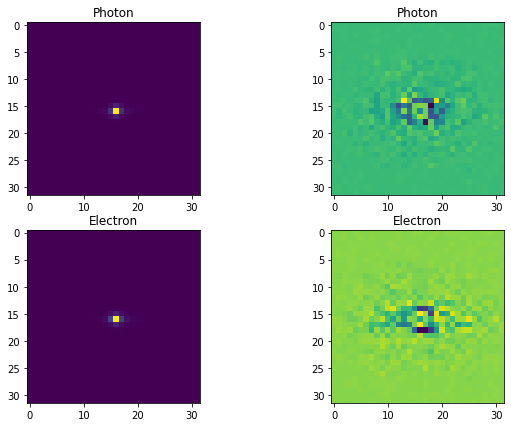

In [245]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = np.where(data.y_train == 0)[0] # Photon
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Photon')

index = np.where(data.y_train == 1)[0] # Electron
for i in range(columns):
    fig.add_subplot(rows, columns,2+i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Electron')

In [208]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 2048)

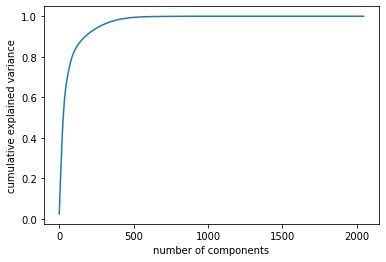

In [209]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [210]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.pca = 16

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz
Performing PCA on data...
Cumulative sum : 32.63123
Performing PCA on data...
Cumulative sum : 36.327488


In [211]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 4, 4, 1) │ (1000, 4, 4, 1) │ (4, 4, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -1.82
Max: 2.21
Mean: -0.00
Std: 0.31
Train labels stats
Min: 0.00
Max: 1.00

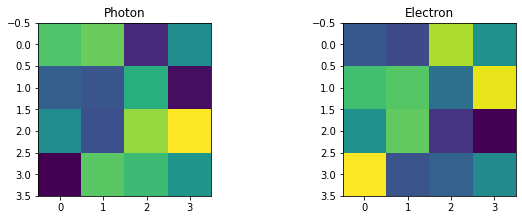

In [214]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [215]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz
Center cropping...
Center cropping...


In [216]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 2) │ (1000, 8, 8, 2) │ (8, 8, 2) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -2.44
Max: 2.23
Mean: 0.01
Std: 0.16
Train labels stats
Min: 0.00
Max: 1.00

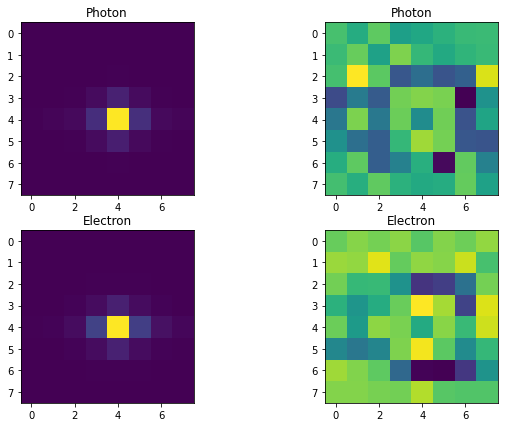

In [217]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = np.where(data.y_train == 0)[0] # Photon
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Photon')

index = np.where(data.y_train == 1)[0] # Electron
for i in range(columns):
    fig.add_subplot(rows, columns,2+i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Electron')

In [218]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 128)

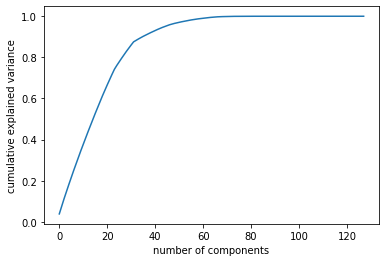

In [219]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [220]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.pca = 16

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz
Center cropping...
Performing PCA on data...
Cumulative sum : 52.573887
Center cropping...
Performing PCA on data...
Cumulative sum : 56.11699


In [221]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 4, 4, 1) │ (1000, 4, 4, 1) │ (4, 4, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -1.81
Max: 2.18
Mean: -0.00
Std: 0.31
Train labels stats
Min: 0.00
Max: 1.00

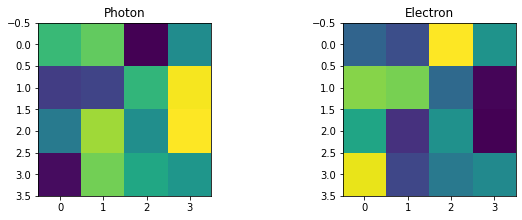

In [222]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [223]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2
args.pca = 64
args.min_max = True

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz
Center cropping...
Performing PCA on data...
Cumulative sum : 99.42621
Min-max scaling...
Center cropping...
Performing PCA on data...
Cumulative sum : 99.49026
Min-max scaling...


In [227]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -3.14
Max: 3.14
Mean: -0.27
Std: 0.51
Train labels stats
Min: 0.00
Max: 1.00

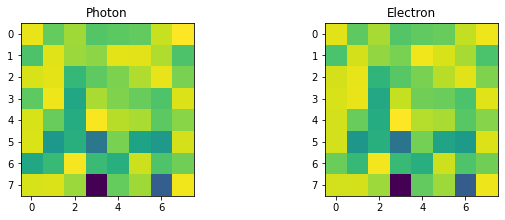

In [228]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')

In [6]:
args = argparse.Namespace()
args.dataset_type = 'med'
# args.center_crop = 0.2
args.graph_conv = 1

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded/electron_photon_med.npz
Performing graph convolution...
(9000, 32, 32, 2)
Performing graph convolution...
(1000, 32, 32, 2)


In [7]:
data

Dataset :Electron Photon med
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 32, 32, 2) │ (1000, 32, 32, 2) │ (32, 32, 2) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: -6.69
Max: 8.27
Mean: 0.16
Std: 0.61
Train labels stats
Min: 0.00
Max: 1.00

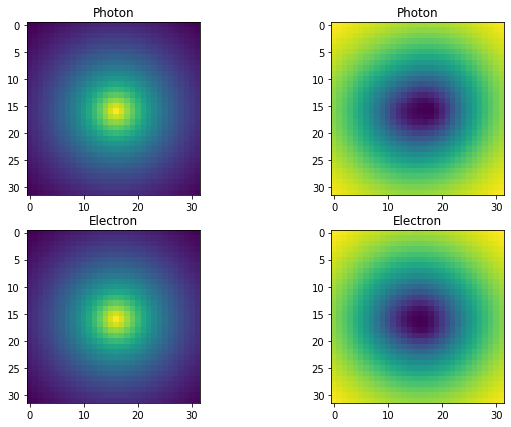

In [8]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = np.where(data.y_train == 0)[0] # Photon
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Photon')

index = np.where(data.y_train == 1)[0] # Electron
for i in range(columns):
    fig.add_subplot(rows, columns,2+i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Electron')

## Quark Gluon

In [234]:
args = argparse.Namespace()

data = QuarkGluon(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded


In [235]:
data

Dataset :Quark Gluon
╒════════╤═══════════════════╤═══════════════════╤═════════════╕
│ Data   │ Train size        │ Test size         │ Dims        │
╞════════╪═══════════════════╪═══════════════════╪═════════════╡
│ X      │ (9000, 39, 39, 3) │ (1000, 39, 39, 3) │ (39, 39, 3) │
├────────┼───────────────────┼───────────────────┼─────────────┤
│ y      │ (9000,)           │ (1000,)           │ (1,)        │
╘════════╧═══════════════════╧═══════════════════╧═════════════╛

Train images stats
Min: 0.00
Max: 7.09
Mean: 0.00
Std: 0.01
Train labels stats
Min: 0.00
Max: 1.00

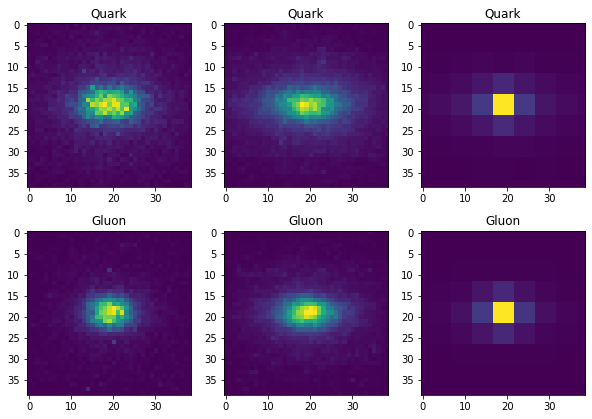

In [236]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3
index = np.where(data.y_train == 0)[0] # Photon
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Quark')

index = np.where(data.y_train == 1)[0] # Electron
for i in range(columns):
    fig.add_subplot(rows, columns,3+i+1)
    plt.imshow(np.mean(data.x_train[index][:,:,:,i], axis=0))
    plt.title('Gluon')

In [237]:
x = data.x_train
x = x.reshape(-1,np.prod(data.config()['input_dims']))
x.shape

(9000, 4563)

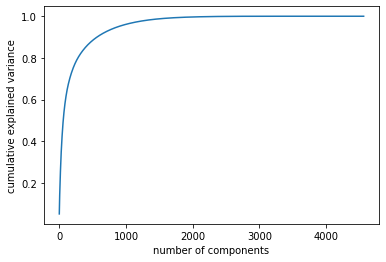

In [238]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [240]:
args = argparse.Namespace()
args.pca = 16

data = QuarkGluon(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Performing PCA on data...
Cumulative sum : 23.58596
Performing PCA on data...
Cumulative sum : 45.603004


In [241]:
data

Dataset :Quark Gluon
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 4, 4, 1) │ (1000, 4, 4, 1) │ (4, 4, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: -0.78
Max: 10.17
Mean: -0.00
Std: 0.06
Train labels stats
Min: 0.00
Max: 1.00

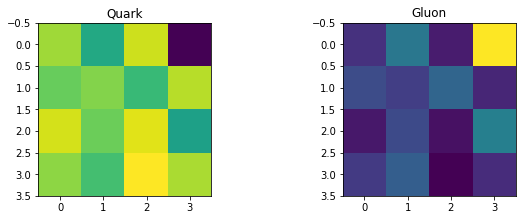

In [242]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Quark' if i ==0 else 'Gluon')